In [1]:
import time
import sys
import os
path_project = "\\".join(os.getcwd().split("\\")[:-1])
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, path_project)

from hardware.hardwaremanager import HardwareManager
from hardware import config as hcf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
hm = HardwareManager()
hm.add_default_hardware()

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
VDI Sythesizer Serail Port Open


In [3]:

from measurement.task_base import JobManager

In [4]:
# from measurement.timesweep import TimeSweep
# task_ts = TimeSweep()
# from measurement.timesweep import HahnEcho
# task_ts = HahnEcho()
from measurement.timesweep import CPMG
task_ts = CPMG()

In [17]:
task_ts.set_paraset(
    rate_refresh=10.0,
    # --------------------
    laser_current=35.0,  # percentage
    mw_freq=392.83640,  # GHz
    mw_powervolt=5.0,  # voltage 0.0 to 5.0
    mw_phasevolt=0.0,  # voltage 0.0 to 5.0
    amp_input=1000,  # input amplitude for digitizer
    bgextend_size=256,  # TODO: why 256? is it a fixed number?
    # -------------------
    init_nslaser=50,  # [ns]
    init_isc=150,
    init_repeat=40,
    init_wait=1000.0,
    t_pi_mwa=100.0,
    read_wait=300.0,
    read_laser=900.0,
    tau_begin=0.0,
    tau_end=10000,
    tau_step=10.0,  # [ns]
    n_pi=5,
)

In [18]:
task_ts.paraset

{'rate_refresh': 10.0,
 'laser_current': 35.0,
 'mw_freq': 392.8364,
 'mw_powervolt': 5.0,
 'mw_phasevolt': 0.0,
 'amp_input': 1000,
 'bgextend_size': 256,
 'init_nslaser': 50,
 'init_isc': 150,
 'init_repeat': 40,
 'init_wait': 1000.0,
 't_pi_mwa': 100.0,
 't_pi_mwb': 100.0,
 'read_wait': 300.0,
 'read_laser': 900.0,
 'tau_begin': 0.0,
 'tau_end': 10000,
 'tau_step': 10.0,
 'n_pi': 5}

In [19]:
# task_ts._setup_exp()
# task_ts._shutdown_exp()

In [ ]:
time_mea = 10.0  # seconds
task_ts.set_stoptime(time_mea)
JobManager().start()
JobManager().submit(task_ts)
JobManager().remove(task_ts)
time.sleep(time_mea/2)

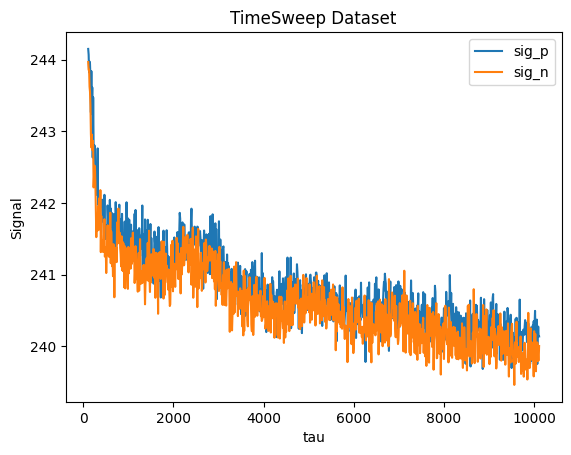

In [ ]:
data = task_ts.get_dataset()
plt.plot(data['tau'], data['sig_p']*1e3, label='sig_p')
plt.plot(data['tau'], data['sig_n']*1e3, label='sig_n')
plt.xlabel('tau')
plt.ylabel('Signal')
plt.legend()
plt.title('TimeSweep Dataset')
plt.show()

In [ ]:
data['dark']

0.244212084426623